In [3]:
!pip install pandas duckdb matplotlib seaborn

import pandas as pd
import duckdb
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [10]:
key_perf_st = 'median_spec_int_perf'
key_perf_mt = 'perf_times_cores'
key_perf_tdp = 'perf_per_tdp'

drop_columns = [key_perf_st, key_perf_mt, key_perf_tdp]

df = pd.read_csv("../tpc_xeon_perf_specrate2006-2017.csv", sep=",")
df = df.drop(columns=drop_columns)
print(df.columns)

print(len(df['model'].unique()))

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'year', 'model',
       'model_launch_year', 'frequency', 'processors', 'cores', 'threads',
       'TDP/CPU (W)', 'TDP-total (W)', 'comment', 'cores_per_cpu'],
      dtype='object')
40


In [52]:
# print(df.columns)
# df.drop(columns=[key_perf_per_tdp], inplace=True)
# print(df.columns)

/var/folders/z4/3bk11y114tn3lh60qlpnzh6m0000gn/T/ipykernel_88309/1354839386.py:49: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


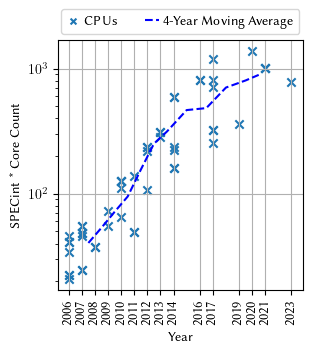

In [53]:
figsize = (3.5, 2)
x_rotation = 90

# if you want to recreate tpc_xeon
# df = df[~df[key_spec_perf].isna()]

# df[key_processors] = df[key_processors].astype(int)
# df[key_cores_per_cpu] = df[key_cores] / df[key_processors]
# df[key_perf] = df[key_spec_perf] * df[key_cores_per_cpu]
# df[key_perf_per_tdp] = df[key_perf] / df[key_tdp]
# df.to_csv("../tpc_xeon_perf.csv", header=True)

# print(df)

# Assuming df is your DataFrame and key_year, key_perf are your column names
df = df.sort_values(by=key_year)

# Scatter plot of original data points
x_val = key_year
y_val = key_perf

# Calculate median performance per year
agg_df = df.groupby(key_year)[y_val].mean().reset_index()

# Calculate moving median with a specified window size
window_size = 4  # Adjust the window size as needed
moving_agg_df = agg_df.rolling(window=window_size, center=True).median()

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df[x_val], df[y_val], marker='x', label='CPUs')

# Scatter plot of median data points
# ax.scatter(agg_df[key_year], agg_df[key_perf], color='red', marker='o', label='Median per Year')

# Plot the moving median
ax.plot(moving_agg_df[x_val], moving_agg_df[y_val], color='blue', linestyle='--', label=f'{window_size}-Year Moving Average')

plt.xlabel('Year')
plt.ylabel("SPECint * Core Count")

ax.set_yscale('log')

# ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.set_xticks(df[x_val].unique())
ax.set_xticklabels(df[x_val].unique())

plt.title('')
plt.xticks(rotation=x_rotation)
plt.ylim(bottom=0)
plt.grid(True)
plt.legend()

# Move legend above the plot in the center
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, handletextpad=0.3, handlelength=1.0, markerscale=0.7, labelspacing=0.1)

plt.tight_layout()
plt.subplots_adjust(top=1.4, bottom=0.15, left=0.30, right=1)
plt.savefig("../figures/tcp_all_cores_perf.pdf", bbox_inches='tight')
plt.show()
plt.close()


/var/folders/z4/3bk11y114tn3lh60qlpnzh6m0000gn/T/ipykernel_88309/3822912144.py:32: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


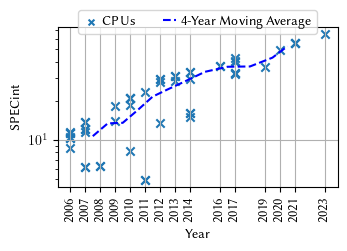

In [54]:
x_val = key_year
y_val = key_spec_perf

# Calculate median performance per year
agg_df = df.groupby(key_year)[y_val].mean().reset_index()

# Calculate moving median with a specified window size
window_size = 4  # Adjust the window size as needed
moving_agg_df = agg_df.rolling(window=window_size, center=True).median()

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df[x_val], df[y_val], marker='x', label='CPUs')

# Scatter plot of median data points
# ax.scatter(agg_df[key_year], agg_df[key_perf], color='red', marker='o', label='Median per Year')

# Plot the moving median
ax.plot(moving_agg_df[x_val], moving_agg_df[y_val], color='blue', linestyle='--', label=f'{window_size}-Year Moving Average')


plt.xlabel('Year')
plt.ylabel("SPECint")

ax.set_yscale('log')

# ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.set_xticks(df[x_val].unique())
ax.set_xticklabels(df[x_val].unique())

plt.title('')
plt.xticks(rotation=x_rotation)
plt.ylim(bottom=0)
plt.grid(True)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, handletextpad=0.3, handlelength=1.0, markerscale=0.7, labelspacing=0.1)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.15, left=0.15, right=0.95)
plt.savefig("../figures/tcp_one_core_perf.pdf", bbox_inches='tight')
plt.show()
plt.close()


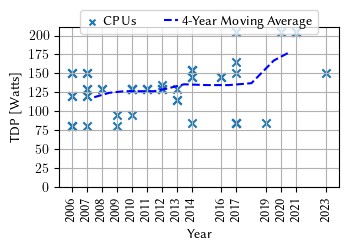

In [55]:
x_val = key_year
y_val = key_tdp


# Calculate median performance per year
agg_df = df.groupby(key_year)[y_val].mean().reset_index()

# Calculate moving median with a specified window size
window_size = 4  # Adjust the window size as needed
moving_agg_df = agg_df.rolling(window=window_size, center=True).median()

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df[x_val], df[y_val], marker='x', label='CPUs')

# Scatter plot of median data points
# ax.scatter(agg_df[key_year], agg_df[key_perf], color='red', marker='o', label='Median per Year')

# Plot the moving median
ax.plot(moving_agg_df[x_val], moving_agg_df[y_val], color='blue', linestyle='--', label=f'{window_size}-Year Moving Average')

ax.set_xlabel('Year')
ax.set_ylabel('TDP [Watts]')

ax.set_xticks(df[x_val].unique())
ax.set_xticklabels(df[x_val].unique())
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))

ax.set_title('')
plt.xticks(rotation=x_rotation)
ax.set_ylim(bottom=0)
plt.grid(True)
plt.tight_layout()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, handletextpad=0.3, handlelength=1.0, markerscale=0.7, labelspacing=0.1)

plt.subplots_adjust(top=0.95, bottom=0.15, left=0.15, right=0.95)
plt.savefig("../figures/tcp_cpus_tdp.pdf", bbox_inches='tight')
plt.show()
plt.close()

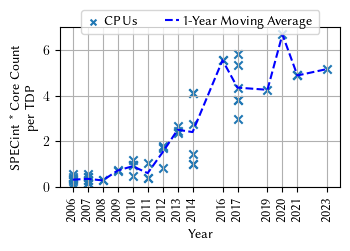

In [56]:
x_val = key_year
y_val = key_perf_per_tdp
# Calculate median performance per year
agg_df = df.groupby(key_year)[y_val].mean().reset_index()

# Calculate moving median with a specified window size
window_size = 1  # Adjust the window size as needed
moving_agg_df = agg_df.rolling(window=window_size, center=True).median()

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df[x_val], df[y_val], marker='x', label='CPUs')

# Scatter plot of median data points
# ax.scatter(agg_df[key_year], agg_df[key_perf], color='red', marker='o', label='Median per Year')

# Plot the moving median
ax.plot(moving_agg_df[x_val], moving_agg_df[y_val], color='blue', linestyle='--', label=f'{window_size}-Year Moving Average')

plt.xlabel('Year')
plt.ylabel("SPECint * Core Count\nper TDP")

# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.set_xticks(df[x_val].unique())
ax.set_xticklabels(df[x_val].unique())

ax.set_title('')
plt.xticks(rotation=x_rotation)
ax.set_ylim(bottom=0)
plt.grid(True)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, handletextpad=0.3, handlelength=1.0, markerscale=0.7, labelspacing=0.1)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.15, left=0.15, right=0.95)
plt.savefig("../figures/tpc_cpus_spec_perf_tdp.pdf", bbox_inches='tight')
plt.show()
plt.close()

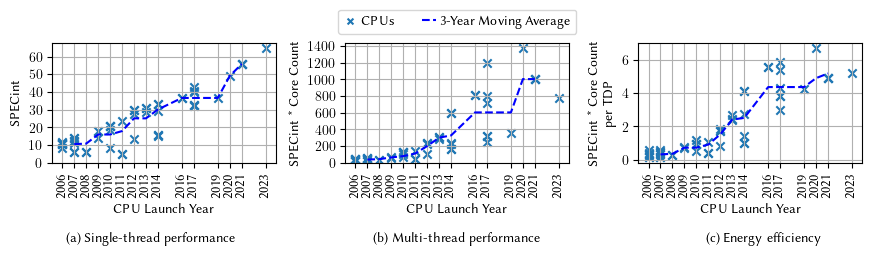

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'text.usetex': True
                            , 'pgf.rcfonts': False
                            , 'text.latex.preamble': r"""\usepackage{iftex}
                                            \ifxetex
                                                \usepackage[libertine]{newtxmath}
                                                \usepackage[tt=false]{libertine}
                                                \setmonofont[StylisticSet=3]{inconsolata}
                                            \else
                                                \RequirePackage[tt=false, type1=true]{libertine}
                                            \fi"""
                         })

# Assuming df is your DataFrame and key_year, key_perf, key_spec_perf, key_perf_per_tdp are your column names
df = df.sort_values(by=key_year)

# Define the figures size and x-axis rotation
figsize = (9, 2)
x_rotation = 90
window_size = 3  # Adjust the window size as needed

# Create a single figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=figsize, sharex=True, sharey=False)

# First subplot (originally second)
x_val = key_year
y_val = key_spec_perf

agg_df = df.groupby(key_year)[y_val].mean().reset_index()
moving_agg_df = agg_df.rolling(window=window_size, center=True).median()

axes[0].scatter(df[x_val], df[y_val], marker='x', label='CPUs')
axes[0].plot(moving_agg_df[x_val], moving_agg_df[y_val], color='blue', linestyle='--', label=f'{window_size}-Year Moving Average')
axes[0].set_xlabel('CPU Launch Year')
axes[0].set_ylabel("SPECint")
axes[0].set_xticks(df[x_val].unique())
axes[0].set_xticklabels(df[x_val].unique())
axes[0].yaxis.set_major_locator(ticker.MultipleLocator(10))
axes[0].tick_params(axis='x', rotation=x_rotation)
axes[0].set_ylim(bottom=0)
# axes[0].set_yscale('symlog')
axes[0].grid(True)
axes[0].set_title("")

# Second subplot (originally first)
y_val = key_perf

agg_df = df.groupby(key_year)[y_val].mean().reset_index()
moving_agg_df = agg_df.rolling(window=window_size, center=True).median()

axes[1].scatter(df[x_val], df[y_val], marker='x', label='CPUs')
axes[1].plot(moving_agg_df[x_val], moving_agg_df[y_val], color='blue', linestyle='--', label=f'{window_size}-Year Moving Average')
axes[1].set_xlabel('CPU Launch Year')
axes[1].set_ylabel("SPECint * Core Count")
axes[1].set_xticks(df[x_val].unique())
axes[1].set_xticklabels(df[x_val].unique())
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(200))
axes[1].tick_params(axis='x', rotation=x_rotation)
axes[1].set_ylim(bottom=0)
# axes[1].set_yscale('symlog')
axes[1].grid(True)
axes[1].set_title("")

# Get the y-axis limits of the second subplot (axes[1])
# ylim = axes[1].get_ylim()

# Apply the same y-axis limits to the first subplot (axes[0])
# axes[0].set_ylim(ylim)

# Third subplot
y_val = key_perf_per_tdp

agg_df = df.groupby(key_year)[y_val].mean().reset_index()
moving_agg_df = agg_df.rolling(window=window_size, center=True).median()

axes[2].scatter(df[x_val], df[y_val], marker='x', label='CPUs')
axes[2].plot(moving_agg_df[x_val], moving_agg_df[y_val], color='blue', linestyle='--', label=f'{window_size}-Year Moving Average')
axes[2].set_xlabel('CPU Launch Year')
axes[2].set_ylabel("SPECint * Core Count\nper TDP")
# axes[2].set_yscale('log')
axes[2].set_xticks(df[x_val].unique())
axes[2].set_xticklabels(df[x_val].unique())
# axes[2].yaxis.set_major_locator(ticker.MultipleLocator(200))
axes[2].tick_params(axis='x', rotation=x_rotation)
# axes[2].set_ylim(bottom=0)
axes[2].grid(True)
axes[2].set_title("")

# Create a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, handletextpad=0.3, handlelength=1.0, markerscale=0.7, labelspacing=0.1)

# Adjust layout to make room for the legend and captions
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.25, left=0.05, right=0.95)

# Add captions below each subplot
fig.text(0.16, -0.15, '(a) Single-thread performance', ha='center', fontsize=10)
fig.text(0.50, -0.15, '(b) Multi-thread performance', ha='center', fontsize=10)
fig.text(0.84, -0.15, '(c) Energy efficiency', ha='center', fontsize=10)

# Save and show the plot
plt.savefig("../figures/tcp_combined_perf.pdf", bbox_inches='tight')
plt.show()
plt.close()
